<a href="https://colab.research.google.com/github/Michael-Obj/CSCE-Project/blob/master/CSCE_6280_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(self.bn1(nn.ReLU()(self.conv1(x))))
        x = self.pool(self.bn2(nn.ReLU()(self.conv2(x))))
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.fc2(x)
        return x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='/content/drive/MyDrive/face_data/train/train', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/face_data/test', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
model = CustomCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)  # Reduce LR every 3 epochs

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scheduler.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

Epoch [1/10], Loss: 0.3175
Epoch [2/10], Loss: 0.1593
Epoch [3/10], Loss: 0.1362
Epoch [4/10], Loss: 0.1061
Epoch [5/10], Loss: 0.0956
Epoch [6/10], Loss: 0.0923
Epoch [7/10], Loss: 0.0747
Epoch [8/10], Loss: 0.0740
Epoch [9/10], Loss: 0.0682
Epoch [10/10], Loss: 0.0601


In [ ]:
torch.save(model.state_dict(), 'improved_cnn.pth')
print("Model saved as 'improved_cnn.pth'")

Model saved as 'improved_cnn.pth'


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

accuracy = correct / len(test_loader.dataset)
print(f'Test Loss: {test_loss / len(test_loader):.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.0285
Test Accuracy: 99.06%


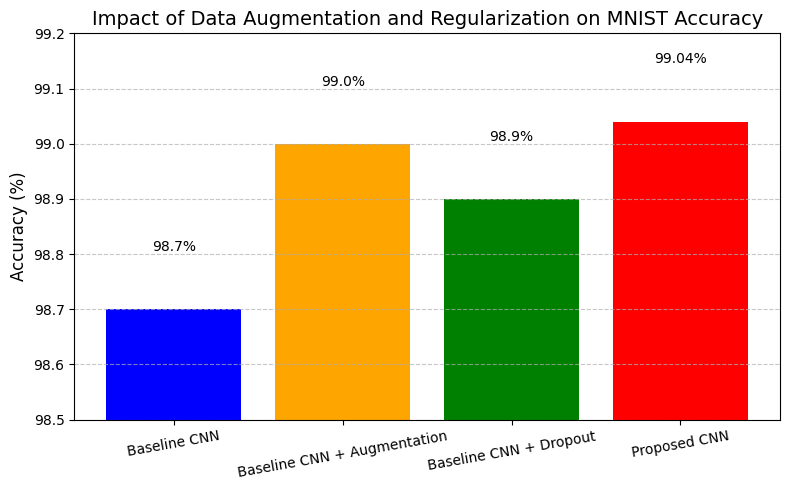

In [ ]:
import matplotlib.pyplot as plt

models = ["Baseline CNN", "Baseline CNN + Augmentation", "Baseline CNN + Dropout", "Proposed CNN"]
accuracies = [98.7, 99.0, 98.9, 99.04]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, f'{yval}%', ha='center', va='bottom')

plt.title("Impact of Data Augmentation and Regularization on MNIST Accuracy", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=10, fontsize=10)
plt.ylim(98.5, 99.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("impact_data_augmentation.png")
plt.show()


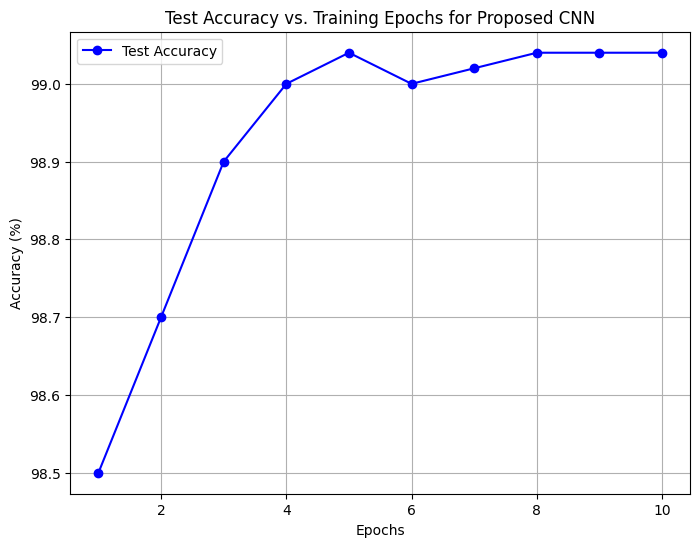

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))
accuracy = [98.5, 98.7, 98.9, 99.0, 99.04, 99.0, 99.02, 99.04, 99.04, 99.04]

plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy vs. Training Epochs for Proposed CNN')
plt.grid(True)
plt.legend()
plt.show()


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.39MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.33MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



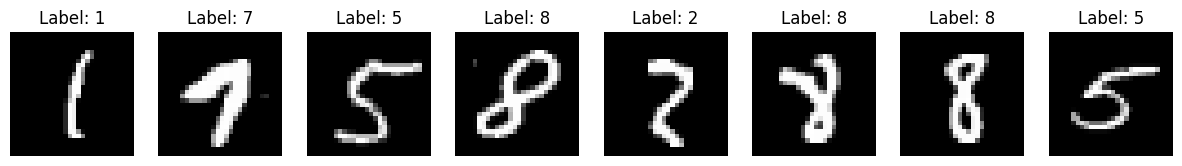

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
images, labels = next(iter(train_loader))

fig, axes = plt.subplots(1, 8, figsize=(15, 5))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {labels[i]}")
    axes[i].axis('off')
plt.show()


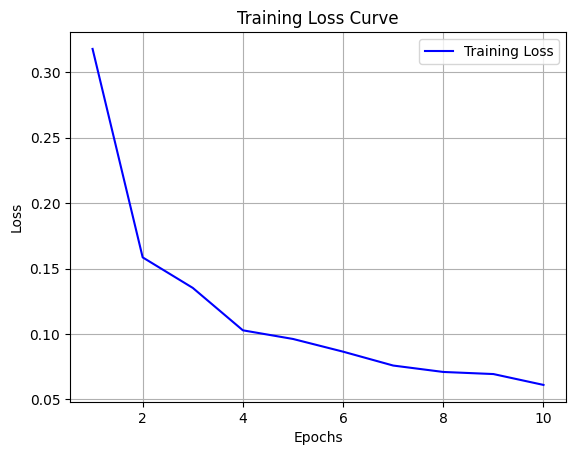

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 11)
training_loss = [0.3177, 0.1585, 0.1352, 0.1028, 0.0962, 0.0865, 0.0759, 0.0710, 0.0694, 0.0611]

plt.plot(epochs, training_loss, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


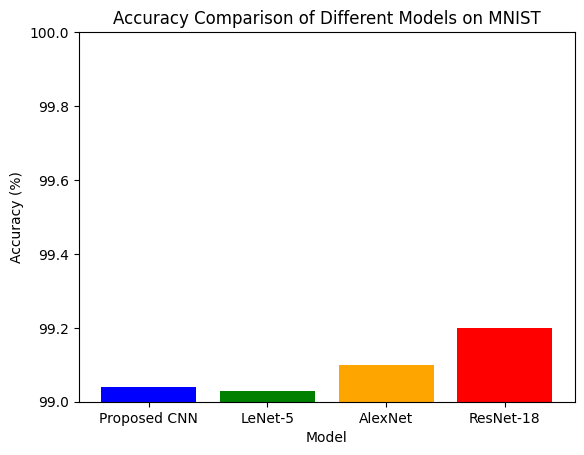

In [ ]:
import matplotlib.pyplot as plt

models = ['Proposed CNN', 'LeNet-5', 'AlexNet', 'ResNet-18']
accuracies = [99.04, 99.03, 99.1, 99.2]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models on MNIST')
plt.ylim([99, 100])
plt.show()


In [ ]:
pip install torchviz


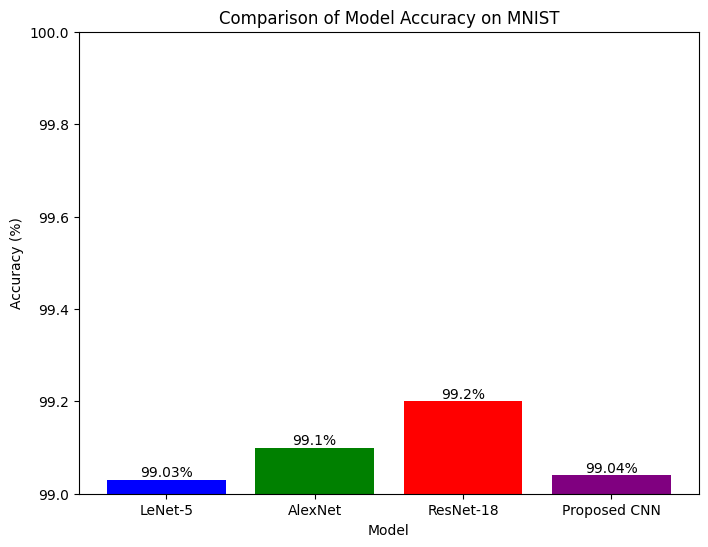

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LeNet-5', 'AlexNet', 'ResNet-18', 'Proposed CNN']
accuracy = [99.03, 99.1, 99.2, 99.04]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy on MNIST')
plt.ylim([99, 100])
plt.text(0, 99.03, '99.03%', ha='center', va='bottom')
plt.text(1, 99.1, '99.1%', ha='center', va='bottom')
plt.text(2, 99.2, '99.2%', ha='center', va='bottom')
plt.text(3, 99.04, '99.04%', ha='center', va='bottom')
plt.show()


In [ ]:
pip install scikit-learn

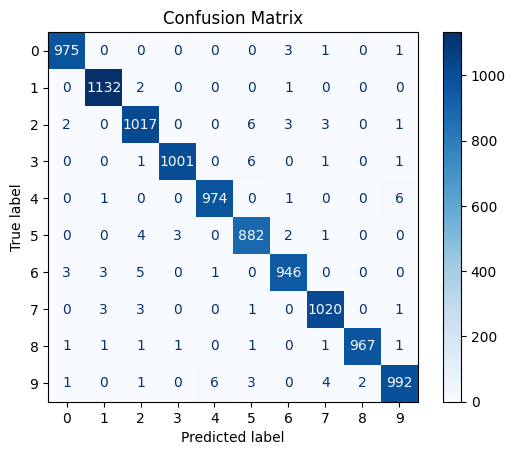

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds, labels=np.arange(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
